# House-price-london project

## Part 1

In [1]:
# imports
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import glob
import seaborn
import geopandas as gpd

### loading and cleaning data

In [2]:
# The size of csv is too big, so we need to load from 3 separated csv file and combine them togeter
df = pd.DataFrame()
for i in sorted(glob.iglob('House-price-london/data/*.csv')):
    df = df.append(pd.read_csv(i, encoding='latin1'))

In [3]:
print(df.shape)

(280598, 17)


In [4]:
df.head()

,Index,serial_number,price/å£,date,postcode,property_type,new_or_not_new,freeholde_lease_hold,street_number,flat_number,street,area1,area2,area3,county,Useless_1,Useless_2
0,0,{6DA0844A-C6F6-30F2-E053-6B04A8C05F3B},12000000,26/01/2018 00:00,TW9 1BP,O,N,F,19 - 21,NaN,THE QUADRANT,NaN,RICHMOND,RICHMOND UPON THAMES,GREATER LONDON,B,A
1,1,{6DA0844A-C6F7-30F2-E053-6B04A8C05F3B},1092250,16/04/2018 00:00,KT17 3JB,D,N,F,57,NaN,LONGDOWN LANE NORTH,NaN,EPSOM,EPSOM AND EWELL,SURREY,B,A
2,2,{6DA0844A-C6F8-30F2-E053-6B04A8C05F3B},505000,20/04/2018 00:00,SM4 4JL,T,N,F,41,NaN,CAMBORNE ROAD,NaN,MORDEN,MERTON,GREATER LONDON,B,A
3,3,{6DA0844A-C6F9-30F2-E053-6B04A8C05F3B},615000,30/04/2018 00:00,KT8 2EJ,D,N,F,421,NaN,WALTON ROAD,NaN,WEST MOLESEY,ELMBRIDGE,SURREY,B,A
4,4,{6DA0844A-C6FA-30F2-E053-6B04A8C05F3B},18000,30/04/2018 00:00,GU21 6NG,O,N,F,179A,NaN,GOLDSWORTH ROAD,NaN,WOKING,WOKING,SURREY,B,A


In [5]:
# drop useless columns and rename price column
df = df.drop(['Index', 'serial_number','Useless_1', 'Useless_2'], axis=1)
df = df.rename(columns={'price/å£':'price'})

In [6]:
df.head(2)

,price,date,postcode,property_type,new_or_not_new,freeholde_lease_hold,street_number,flat_number,street,area1,area2,area3,county
0,12000000,26/01/2018 00:00,TW9 1BP,O,N,F,19 - 21,NaN,THE QUADRANT,NaN,RICHMOND,RICHMOND UPON THAMES,GREATER LONDON
1,1092250,16/04/2018 00:00,KT17 3JB,D,N,F,57,NaN,LONGDOWN LANE NORTH,NaN,EPSOM,EPSOM AND EWELL,SURREY


In [7]:
# Check the data type
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 280598 entries, 0 to 93532
Data columns (total 13 columns):
price                   280598 non-null int64
date                    280598 non-null object
postcode                278830 non-null object
property_type           280598 non-null object
new_or_not_new          280598 non-null object
freeholde_lease_hold    280598 non-null object
street_number           280598 non-null object
flat_number             35303 non-null object
street                  275242 non-null object
area1                   103140 non-null object
area2                   280598 non-null object
area3                   280598 non-null object
county                  280598 non-null object
dtypes: int64(1), object(12)
memory usage: 30.0+ MB


### Narrow down to Greaater London areas

In [8]:
df_london = df[df['county']=='GREATER LONDON']

In [9]:
# change date column into da
df_london.date = pd.to_datetime(df_london.date, dayfirst=True)
df_london.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30309 entries, 0 to 93260
Data columns (total 13 columns):
price                   30309 non-null int64
date                    30309 non-null datetime64[ns]
postcode                30060 non-null object
property_type           30309 non-null object
new_or_not_new          30309 non-null object
freeholde_lease_hold    30309 non-null object
street_number           30309 non-null object
flat_number             10753 non-null object
street                  30308 non-null object
area1                   2082 non-null object
area2                   30309 non-null object
area3                   30309 non-null object
county                  30309 non-null object
dtypes: datetime64[ns](1), int64(1), object(11)
memory usage: 3.2+ MB


/Users/kunsitu/anaconda2/envs/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:4405: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [10]:
date = sorted(list(df_london.date))
print('data is from {} to {}'.format(date[0], date[-1]))

data is from 2018-01-01 00:00:00 to 2018-05-30 00:00:00


In [11]:
# check out the difference between 3 areas
area1_count = df_london.area1.value_counts()
area2_count = df_london.area2.value_counts()
area3_count = df_london.area3.value_counts()
print(len(area1_count))
print(len(area2_count))
print(len(area3_count))

198
74
33


In [12]:
# Essential area3 are boroughs in Lodon
print(area3_count)

WANDSWORTH                1522
BROMLEY                   1481
CROYDON                   1457
BARNET                    1253
NEWHAM                    1245
LAMBETH                   1185
HAVERING                  1139
CITY OF WESTMINSTER       1079
BEXLEY                    1040
HILLINGDON                1036
LEWISHAM                  1030
SOUTHWARK                  991
GREENWICH                  973
EALING                     963
ENFIELD                    937
WALTHAM FOREST             928
REDBRIDGE                  894
TOWER HAMLETS              894
SUTTON                     858
RICHMOND UPON THAMES       843
HOUNSLOW                   808
MERTON                     785
CAMDEN                     771
HARROW                     762
HACKNEY                    722
BRENT                      714
BARKING AND DAGENHAM       711
HAMMERSMITH AND FULHAM     706
HARINGEY                   676
KENSINGTON AND CHELSEA     653
KINGSTON UPON THAMES       630
ISLINGTON                  536
CITY OF 

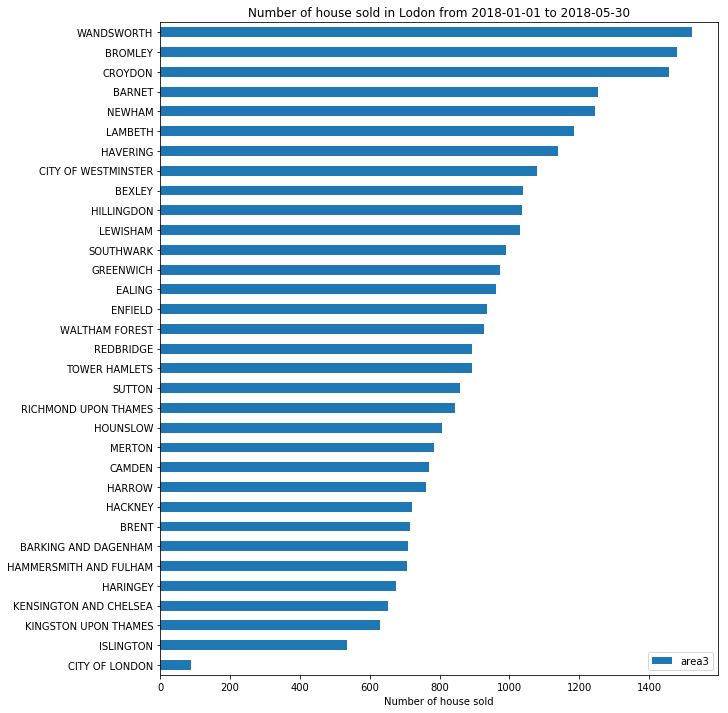

In [13]:
# Have a look the number of house sold during this peroid
dfarea3 = pd.DataFrame(area3_count)
ax1 = dfarea3.plot(kind='barh', figsize=(10,12))
plt.xlabel('Number of house sold')
plt.title('Number of house sold in Lodon from 2018-01-01 to 2018-05-30')
ax1.invert_yaxis()

### Random data exploration

In [14]:
# Let's try to get more data
df_london[df_london['area3']=='CITY OF LONDON'] \
                        .groupby(['area3','property_type'])['price'] \
                        .agg(['mean', 'size', 'min', 'max', 'std'])

mean  size     min        max  \
area3          property_type                                          
CITY OF LONDON F              7.935800e+05    50  417000    3015000   
               O              1.958669e+07    37    3076  140000000   

                                       std  
area3          property_type                
CITY OF LONDON F              4.251700e+05  
               O              3.736425e+07

NOTE: For property types: D = Detached, S = Semi-Detached, T = Terraced, F = Flats/Maisonettes, O = Other 

In [76]:
# let's get the same data for all areas by using the same groupby methods (just for flat)
df_london_flat_sta = df_london[df_london.property_type == 'F'].groupby(['area3','property_type'], as_index=True)['price'] \
                        .agg(['mean', 'size', 'min', 'max', 'std'])
df_london_flat_sta.head(10)

,,mean,size,min,max,std
area3,property_type,,,,,
BARKING AND DAGENHAM,F,2.301407e+05,165,84000,354995,5.169526e+04
BARNET,F,4.152832e+05,536,100000,2000000,1.990926e+05
BEXLEY,F,2.371897e+05,269,86000,468950,6.279481e+04
BRENT,F,4.000753e+05,329,90000,1300000,1.844106e+05
BROMLEY,F,3.282921e+05,428,85750,1150000,1.162992e+05
CAMDEN,F,9.377106e+05,551,176000,10700000,9.481765e+05
CITY OF LONDON,F,7.935800e+05,50,417000,3015000,4.251700e+05
CITY OF WESTMINSTER,F,1.590127e+06,809,135000,35300000,2.679744e+06
CROYDON,F,2.794874e+05,496,84000,800000,1.000105e+05


### Ploting London heatmap

In [77]:
df_london_flat_sta = df_london_flat_sta.reset_index().drop(['property_type'], axis=1)

In [95]:
from geopandas import GeoDataFrame
map_df = gpd.read_file('data/shape/London_Borough_Excluding_MHW.shp')
print(map_df.shape)
map_df.head()

(33, 8)


,NAME,GSS_CODE,HECTARES,NONLD_AREA,ONS_INNER,SUB_2009,SUB_2006,geometry
0,Kingston upon Thames,E09000021,3726.117,0.000,F,None,None,"POLYGON ((516401.6 160201.8, 516407.3 160210.5..."
1,Croydon,E09000008,8649.441,0.000,F,None,None,"POLYGON ((535009.2 159504.7, 535005.5 159502, ..."
2,Bromley,E09000006,15013.487,0.000,F,None,None,"POLYGON ((540373.6 157530.4, 540361.2 157551.9..."
3,Hounslow,E09000018,5658.541,60.755,F,None,None,"POLYGON ((521975.8 178100, 521967.7 178096.8, ..."
4,Ealing,E09000009,5554.428,0.000,F,None,None,"POLYGON ((510253.5 182881.6, 510249.9 182886, ..."


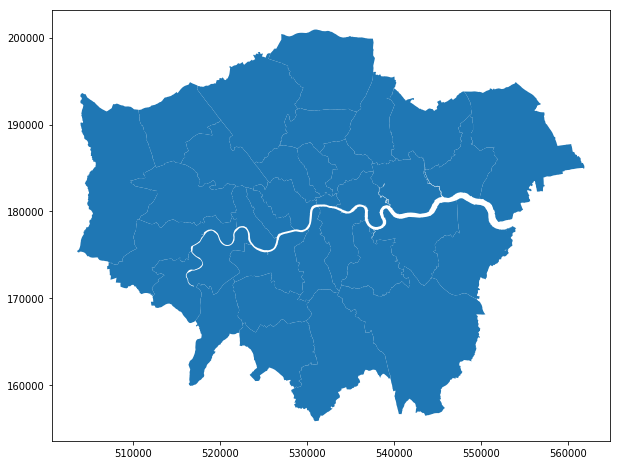

In [90]:
map_df.plot(figsize=(10,8))

In [98]:
# Lets merage map dataframe with our London stats data frame
# change name to all caps for the map df
map_df['area3'] = map_df.apply(lambda x: x[0].upper(), 1)

In [80]:
# some preprocessing, as CITY OF WESTMINSTER was called differently in the map file
idx = df_london_flat_sta.area3[df_london_flat_sta.area3=='CITY OF WESTMINSTER'].index.tolist()
df_london_flat_sta.at[idx[0], 'area3'] = 'WESTMINSTER'

**_Set the format for geopandas_**

In [101]:
map_df2 = map_df[['NAME', 'area3']]
df_london_flat_sta = df_london_flat_sta.merge(map_df2, how='left', on='area3')

In [109]:
df_london_flat_sta = df_london_flat_sta.rename(columns={'NAME': 'borough'})

In [113]:
map_df=map_df.drop(['area3'], axis=1)

In [114]:
London = map_df.set_index('NAME').join(df_london_flat_sta.set_index('borough'))

**_Ploting_**

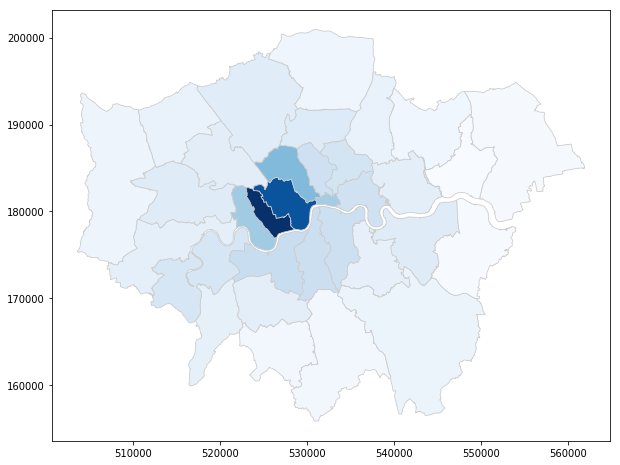

In [138]:
# Now let's plot the mean house price in the map
fig, ax = plt.subplots(1, figsize=(10, 8))
London.plot(column='mean', cmap='Blues',linewidth=0.8,  ax=ax,edgecolor='0.8')

In [139]:
# Customising the map
ax.axis('off')
ax.set_title('Average Flat price in London', fontdict={'fontsize': '30', 'fontweight' : '3'})
# Create colorbar as a legend
vmin = round(min(list(df_london_flat_sta['mean'])), 2)
vmax = round(max(list(df_london_flat_sta['mean'])), 2)
sm = plt.cm.ScalarMappable(cmap='Blues', norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm._A = []
cbar = fig.colorbar(sm)

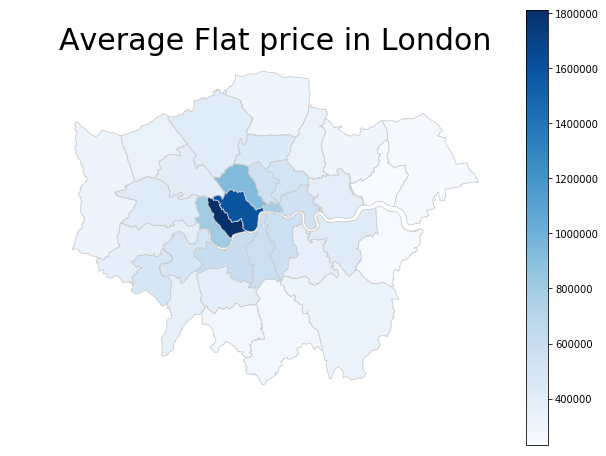

In [140]:
fig

**_Save image_**

In [ ]:
# fig.savefig(“map_export.png”, dpi=300)

**_Ploting function_**

In [149]:
def london_plot(col, title=None, size = 1):
    '''size best between 0.8 to 2'''
    fig, ax = plt.subplots(1, figsize=(size*10, size*8))
    ax.axis('off')
    ax.set_title(title, fontdict={'fontsize': '30', 'fontweight' : '3'})
    vmin = round(min(list(London[col])), 2)
    vmax = round(max(list(London[col])), 2)
    sm = plt.cm.ScalarMappable(cmap='Blues', norm=plt.Normalize(vmin=vmin, vmax=vmax))
    sm._A = []
    cbar = fig.colorbar(sm)
    London.plot(column=col, cmap='Blues',linewidth=0.8,  ax=ax,edgecolor='0.8')

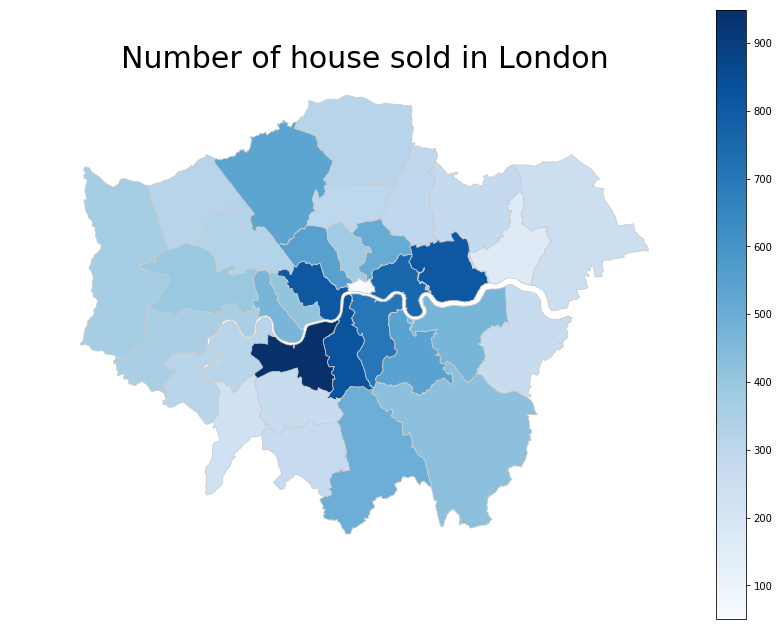

In [150]:
# call function with size column
london_plot('size', title = 'Number of house sold in London', size=1.4)

In [151]:
### TBC